# **Clustering Assignments 4**

**Perform hierarchical clustering on the Play data and the data generated with the help of two equations of concentric circles, adding some random noise. Apply various distance measures, including single, multiple, and average linkages, and ward.**

### **Hierarchical Clustering**

**Play Dataset**

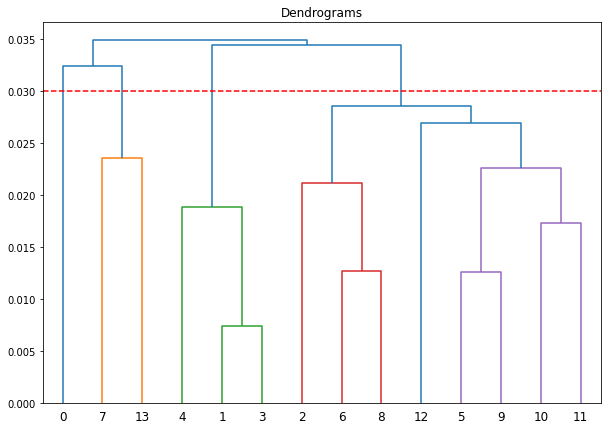

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
%matplotlib inline

play = pd.read_excel('play.xlsx',sheet_name='play')
play = pd.get_dummies(play, columns=['Outlook','Windy'])
play['Decision'] = play['Decision'].replace(['play','dont_play'],[1,0])
play_scaled = normalize(play)
play_scaled = pd.DataFrame(play_scaled, columns=play.columns)

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(play_scaled, method='single'))
plt.axhline(y=0.03, color='r', linestyle='--')

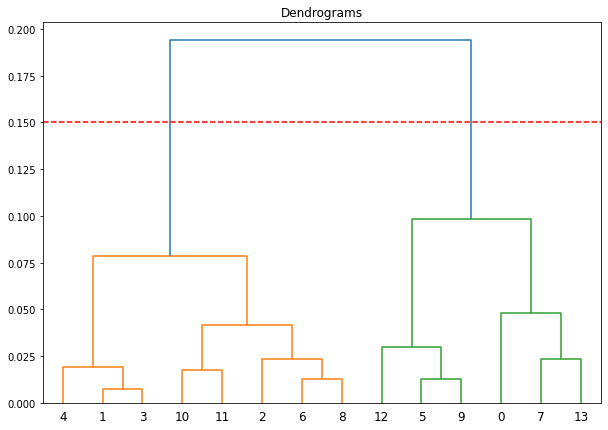

In [2]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend1 = shc.dendrogram(shc.linkage(play_scaled, method='complete'))
plt.axhline(y=0.15, color='r', linestyle='--')

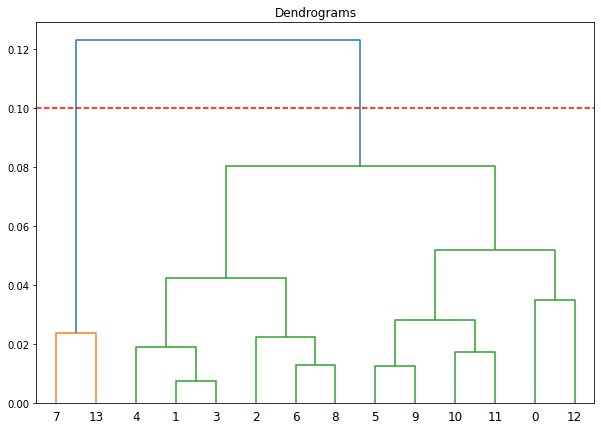

In [3]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(play_scaled, method='average'))
plt.axhline(y=0.1, color='r', linestyle='--')

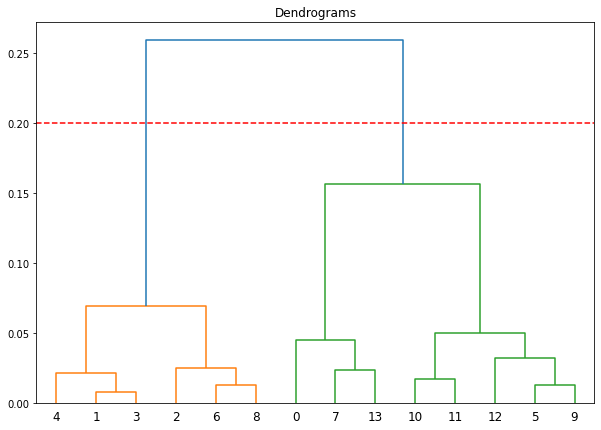

In [4]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(play_scaled, method='ward'))
plt.axhline(y=0.2, color='r', linestyle='--')

**Concentric Circles**

           X         Y
0  -0.704552  0.625990
1  -0.084317  0.044466
2  -0.225009 -0.764524
3  -0.093784  0.974263
4   0.799605  0.331578
..       ...       ...
95  0.030277  0.153108
96  0.023566  0.012058
97  0.177865 -0.151277
98 -1.164857 -0.124609
99  0.000830 -0.015306

[100 rows x 2 columns]



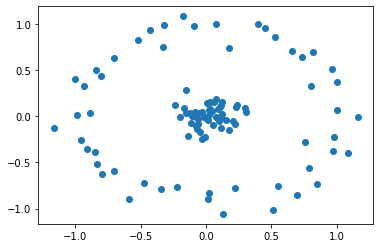

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

X, y = make_circles(100, factor = 0.1, noise = 0.1)

circles_df = pd.DataFrame(X[:, 0], columns=['X'])
circles_df["Y"] = X[:, 1]

print(circles_df)
print()

plt.scatter(circles_df['X'], circles_df['Y'])

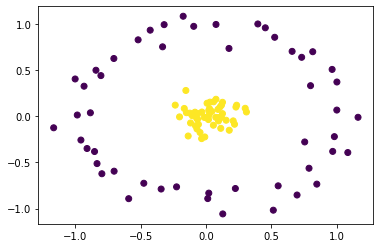

In [6]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
labels = hierarchical_cluster.fit_predict(circles_df)

plt.scatter(circles_df['X'], circles_df['Y'], c=labels)
plt.show()

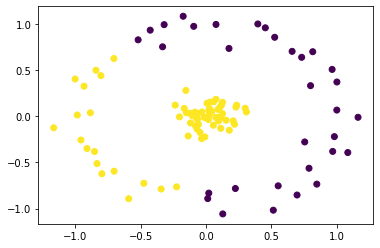

In [7]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(circles_df)

plt.scatter(circles_df['X'], circles_df['Y'], c=labels)
plt.show()

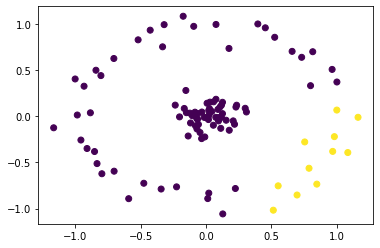

In [8]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(circles_df)

plt.scatter(circles_df['X'], circles_df['Y'], c=labels)
plt.show()

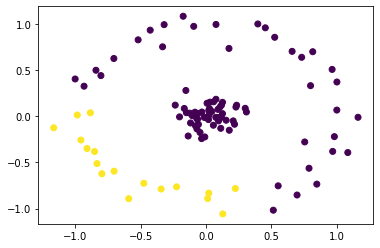

In [9]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(circles_df)

plt.scatter(circles_df['X'], circles_df['Y'], c=labels)
plt.show()

**Perform k-Means clustering on the Play data and also Boston housing data and arrive at an optimal number of clusters via the elbow method.**

### **k-Means Clustering**

**Play Dataset**

In [1]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


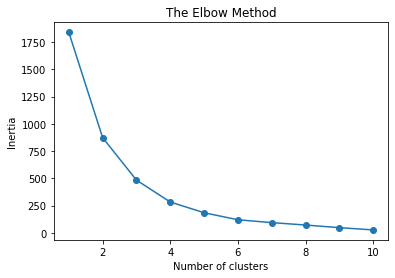

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

play = pd.read_excel('play.xlsx',sheet_name='play')
cat_var = play
dec_var = play['Decision']
clstrs = []

play = pd.get_dummies(play, columns=['Outlook','Windy'])
play['Decision'] = play['Decision'].replace(['play','dont_play'],[1,0])

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(play)
    clstrs.append(kmeans.inertia_)

plt.plot(range(1, 11), clstrs, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Boston Housing Dataset**

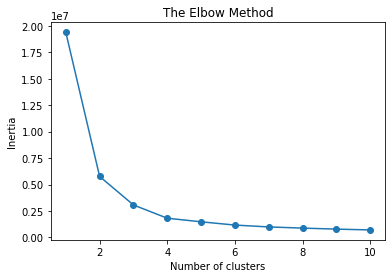

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

bos_hous = pd.read_excel('boston housing.xls')
bos_hous.head()
dec_var = bos_hous['MV']
clstrs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(bos_hous)
    clstrs.append(kmeans.inertia_)

plt.plot(range(1, 11), clstrs, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()